In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets

import requests
import json
import time


In [3]:
incendios = pd.DataFrame.from_csv("./Datasets/MODIS_C6_South_America_24h.csv", sep = ",")

In [4]:
incendios = incendios.reset_index()
incendios = incendios.loc[:, "latitude":]
incendios 

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,-17.901,-40.075,310.7,1.1,1.0,10/19/2018,125,T,81,6.0NRT,289.5,10.0,N
1,-17.903,-40.085,308.2,1.0,1.0,10/19/2018,125,T,74,6.0NRT,289.9,8.1,N
2,-17.255,-39.397,305.5,1.1,1.1,10/19/2018,125,T,65,6.0NRT,289.9,7.4,N
3,-17.257,-39.407,330.0,1.1,1.1,10/19/2018,125,T,100,6.0NRT,290.6,34.1,N
4,-17.235,-39.518,304.5,1.1,1.1,10/19/2018,125,T,60,6.0NRT,289.5,6.0,N
5,-17.226,-39.520,302.7,1.1,1.1,10/19/2018,125,T,51,6.0NRT,290.3,4.8,N
6,-16.702,-40.123,315.9,1.1,1.0,10/19/2018,125,T,92,6.0NRT,289.8,15.3,N
7,-16.704,-40.132,320.0,1.1,1.0,10/19/2018,125,T,100,6.0NRT,289.9,19.3,N
8,-16.693,-40.124,305.6,1.1,1.0,10/19/2018,125,T,65,6.0NRT,288.9,7.4,N
9,-16.569,-40.146,300.3,1.1,1.0,10/19/2018,125,T,23,6.0NRT,288.8,3.6,N


In [5]:
incendios.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,-9.186540,-55.309444,322.372722,1.603038,1.213987,1190.041139,66.851266,293.159810,35.369367
std,8.291466,10.609701,17.426720,0.760298,0.233134,631.875017,21.708210,7.880252,66.232202
min,-52.878000,-80.221000,300.000000,1.000000,1.000000,30.000000,0.000000,267.000000,0.000000
25%,-14.059500,-63.086500,311.200000,1.100000,1.000000,425.000000,53.000000,288.800000,10.700000
50%,-6.794500,-53.041000,319.800000,1.300000,1.100000,1535.000000,69.000000,293.000000,19.050000
75%,-3.729750,-46.820250,328.600000,1.900000,1.300000,1645.000000,83.000000,298.500000,35.425000
max,11.623000,-35.049000,467.400000,4.800000,2.000000,1825.000000,100.000000,322.300000,1001.200000


In [6]:
incendios.corr()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
latitude,1.000000,0.244249,0.029473,0.030470,0.037730,0.293489,-0.099178,0.176252,-0.001136
longitude,0.244249,1.000000,0.096070,0.073756,0.072922,-0.098048,-0.010630,0.266302,0.052215
brightness,0.029473,0.096070,1.000000,-0.170487,-0.173454,0.349872,0.519856,0.473299,0.754337
scan,0.030470,0.073756,-0.170487,1.000000,0.982754,-0.086415,-0.085672,-0.296898,0.187433
track,0.037730,0.072922,-0.173454,0.982754,1.000000,-0.095670,-0.077950,-0.302858,0.176061
acq_time,0.293489,-0.098048,0.349872,-0.086415,-0.095670,1.000000,-0.132428,0.431328,0.064203
confidence,-0.099178,-0.010630,0.519856,-0.085672,-0.077950,-0.132428,1.000000,0.137749,0.335777
bright_t31,0.176252,0.266302,0.473299,-0.296898,-0.302858,0.431328,0.137749,1.000000,0.115159
frp,-0.001136,0.052215,0.754337,0.187433,0.176061,0.064203,0.335777,0.115159,1.000000


In [7]:
incendios['incendio'] = incendios.apply(lambda x: 1 if x['confidence'] >= 66 else 0, axis=1)
incendios

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight,incendio
0,-17.901,-40.075,310.7,1.1,1.0,10/19/2018,125,T,81,6.0NRT,289.5,10.0,N,1
1,-17.903,-40.085,308.2,1.0,1.0,10/19/2018,125,T,74,6.0NRT,289.9,8.1,N,1
2,-17.255,-39.397,305.5,1.1,1.1,10/19/2018,125,T,65,6.0NRT,289.9,7.4,N,0
3,-17.257,-39.407,330.0,1.1,1.1,10/19/2018,125,T,100,6.0NRT,290.6,34.1,N,1
4,-17.235,-39.518,304.5,1.1,1.1,10/19/2018,125,T,60,6.0NRT,289.5,6.0,N,0
5,-17.226,-39.520,302.7,1.1,1.1,10/19/2018,125,T,51,6.0NRT,290.3,4.8,N,0
6,-16.702,-40.123,315.9,1.1,1.0,10/19/2018,125,T,92,6.0NRT,289.8,15.3,N,1
7,-16.704,-40.132,320.0,1.1,1.0,10/19/2018,125,T,100,6.0NRT,289.9,19.3,N,1
8,-16.693,-40.124,305.6,1.1,1.0,10/19/2018,125,T,65,6.0NRT,288.9,7.4,N,0
9,-16.569,-40.146,300.3,1.1,1.0,10/19/2018,125,T,23,6.0NRT,288.8,3.6,N,0


In [8]:
tiempo_dia = incendios["daynight"]
tiempo_dia.describe()

count     1580
unique       2
top          D
freq      1068
Name: daynight, dtype: object

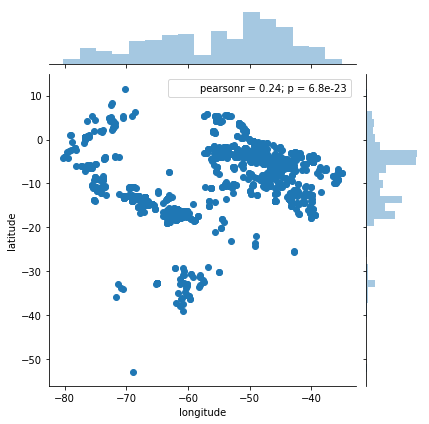

In [9]:
sns.jointplot(x="longitude", y="latitude", data=incendios)
plt.show()

In [10]:
incendios["fecha"] = pd.to_datetime(incendios["acq_date"])
incendios_1 = incendios[["fecha", "daynight"]].groupby(["fecha", "daynight"])
incendios_1.count()

Empty DataFrame
Columns: []
Index: [(2018-10-19 00:00:00, D), (2018-10-19 00:00:00, N), (2018-10-20 00:00:00, D), (2018-10-20 00:00:00, N)]

In [11]:
incendios.sort_values(['fecha', 'longitude', 'latitude', 'brightness'], ascending=[True, True, True, True])

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight,incendio,fecha
1323,-4.147,-80.221,308.7,3.0,1.6,10/19/2018,1825,A,55,6.0NRT,287.2,18.0,D,0,2018-10-19
1329,-3.874,-80.015,312.4,2.8,1.6,10/19/2018,1825,A,63,6.0NRT,293.5,23.6,D,0,2018-10-19
1327,-3.876,-80.006,314.2,2.8,1.6,10/19/2018,1825,A,68,6.0NRT,293.0,30.8,D,1,2018-10-19
1328,-3.870,-79.989,312.0,2.8,1.6,10/19/2018,1825,A,62,6.0NRT,293.5,23.7,D,0,2018-10-19
1326,-3.937,-79.917,319.8,2.8,1.6,10/19/2018,1825,A,75,6.0NRT,291.7,57.4,D,1,2018-10-19
1324,-3.940,-79.912,321.9,2.8,1.6,10/19/2018,1825,A,78,6.0NRT,291.3,66.9,D,1,2018-10-19
1325,-3.934,-79.891,309.0,2.8,1.6,10/19/2018,1825,A,46,6.0NRT,290.6,18.9,D,0,2018-10-19
566,-2.773,-79.530,312.9,1.3,1.1,10/19/2018,1530,T,54,6.0NRT,293.9,9.0,D,0,2018-10-19
567,-4.186,-79.449,321.3,1.3,1.1,10/19/2018,1530,T,65,6.0NRT,300.6,14.0,D,0,2018-10-19
565,-2.667,-79.348,323.2,1.3,1.1,10/19/2018,1530,T,74,6.0NRT,298.9,20.9,D,1,2018-10-19


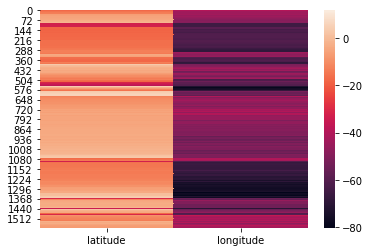

In [10]:
incendios_1 = incendios.loc[:, "latitude": "longitude"]
incendios_1.to_csv("Latitud_Longitud.csv", sep=',', encoding='utf-8', index=False)
ax = sns.heatmap(incendios_1)
plt.show()

In [9]:
gmaps.configure(api_key="AI...") # Your Google API key

# load a Numpy array of (latitude, longitude) pairs
# locations = gmaps.datasets.load_dataset("taxi_rides")

# fig = gmaps.figure()
# fig.add_layer(gmaps.heatmap_layer(locations))
# fig

In [12]:


incendios['temperatura'] = incendios.apply(lambda x: x['latitude'], axis=1)
incendios['humedad'] = incendios['pr_atm'] = incendios['temp_min'] = incendios['temp_max'] = incendios['temperatura']

incendios


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight,incendio,fecha,temperatura,humedad,pr_atm,temp_min,temp_max
0,-17.901,-40.075,310.7,1.1,1.0,10/19/2018,125,T,81,6.0NRT,289.5,10.0,N,1,2018-10-19,-17.901,-17.901,-17.901,-17.901,-17.901
1,-17.903,-40.085,308.2,1.0,1.0,10/19/2018,125,T,74,6.0NRT,289.9,8.1,N,1,2018-10-19,-17.903,-17.903,-17.903,-17.903,-17.903
2,-17.255,-39.397,305.5,1.1,1.1,10/19/2018,125,T,65,6.0NRT,289.9,7.4,N,0,2018-10-19,-17.255,-17.255,-17.255,-17.255,-17.255
3,-17.257,-39.407,330.0,1.1,1.1,10/19/2018,125,T,100,6.0NRT,290.6,34.1,N,1,2018-10-19,-17.257,-17.257,-17.257,-17.257,-17.257
4,-17.235,-39.518,304.5,1.1,1.1,10/19/2018,125,T,60,6.0NRT,289.5,6.0,N,0,2018-10-19,-17.235,-17.235,-17.235,-17.235,-17.235
5,-17.226,-39.520,302.7,1.1,1.1,10/19/2018,125,T,51,6.0NRT,290.3,4.8,N,0,2018-10-19,-17.226,-17.226,-17.226,-17.226,-17.226
6,-16.702,-40.123,315.9,1.1,1.0,10/19/2018,125,T,92,6.0NRT,289.8,15.3,N,1,2018-10-19,-16.702,-16.702,-16.702,-16.702,-16.702
7,-16.704,-40.132,320.0,1.1,1.0,10/19/2018,125,T,100,6.0NRT,289.9,19.3,N,1,2018-10-19,-16.704,-16.704,-16.704,-16.704,-16.704
8,-16.693,-40.124,305.6,1.1,1.0,10/19/2018,125,T,65,6.0NRT,288.9,7.4,N,0,2018-10-19,-16.693,-16.693,-16.693,-16.693,-16.693
9,-16.569,-40.146,300.3,1.1,1.0,10/19/2018,125,T,23,6.0NRT,288.8,3.6,N,0,2018-10-19,-16.569,-16.569,-16.569,-16.569,-16.569


In [13]:
nuevo_dataset = pd.DataFrame(columns=list(incendios))
print(nuevo_dataset)

# def obtenerData(data):
#     for 
#     return


Empty DataFrame
Columns: [latitude, longitude, brightness, scan, track, acq_date, acq_time, satellite, confidence, version, bright_t31, frp, daynight, incendio, fecha, temperatura, humedad, pr_atm, temp_min, temp_max]
Index: []


In [14]:

def obtenerData(row):
    
    url = "http://api.openweathermap.org/data/2.5/weather?appid=35d3153a253e2536f49f02fd8080dfc2&lat={}&lon={}".format(row['latitude'], row['longitude'])
    
    
    req = requests.get(url)
    res = req.json()
    
    
    row['temperatura'] = res["main"]["temp"]
    row['humedad'] = res["main"]["humidity"]
    row['pr_atm'] = res["main"]["pressure"]
    row['temp_min'] = res["main"]["temp_min"]
    row['temp_max'] = res["main"]["temp_max"]
    return row

# print(res['documentation_url']), 
# incendios.loc[:, 'temperatura':'temp_max'] = incendios.apply(lambda x : [x['latitude'] + 2, 2], axis=1)
# incendios




In [ ]:
for i in range(0, 300, 60):
    
    inicio = i
    fin = i + 60
    if (fin > len(incendios)):
        fin = len(incendios)
    
    incendios_3 = incendios.loc[inicio: fin]
    
#     df_2 = incendios_3.loc[:, 'temperatura':'temp_max']
#     df_3 = incendios_3.loc[:, 'latitude': 'longitude']
#     df_4 = incendios_3.loc[:, 'daynight']
#     resultado = pd.concat([df_3, df_2], axis=1)
    # df_2 = incendios.apply(lambda x : [x['latitude'] + 2, 2], axis=1)
    #resultado = resultado.apply(obtenerData, axis=1)

    resultado = incendios_3.apply(obtenerData, axis=1)
    nuevo_dataset = pd.concat([nuevo_dataset, resultado])
    
    time.sleep(60)

In [22]:
nuevo_dataset

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight,incendio,fecha,temperatura,humedad,pr_atm,temp_min,temp_max
0,-17.901,-40.075,310.7,1.1,1.0,10/19/2018,125,T,81,6.0NRT,289.5,10.0,N,1,2018-10-19,299.971,54,1014.13,299.971,299.971
1,-17.903,-40.085,308.2,1.0,1.0,10/19/2018,125,T,74,6.0NRT,289.9,8.1,N,1,2018-10-19,299.971,54,1014.13,299.971,299.971
2,-17.255,-39.397,305.5,1.1,1.1,10/19/2018,125,T,65,6.0NRT,289.9,7.4,N,0,2018-10-19,298.971,57,1020.45,298.971,298.971
3,-17.257,-39.407,330.0,1.1,1.1,10/19/2018,125,T,100,6.0NRT,290.6,34.1,N,1,2018-10-19,298.971,57,1020.45,298.971,298.971
4,-17.235,-39.518,304.5,1.1,1.1,10/19/2018,125,T,60,6.0NRT,289.5,6.0,N,0,2018-10-19,298.971,57,1020.45,298.971,298.971
5,-17.226,-39.520,302.7,1.1,1.1,10/19/2018,125,T,51,6.0NRT,290.3,4.8,N,0,2018-10-19,298.971,57,1020.45,298.971,298.971
6,-16.702,-40.123,315.9,1.1,1.0,10/19/2018,125,T,92,6.0NRT,289.8,15.3,N,1,2018-10-19,294.596,71,973.84,294.596,294.596
7,-16.704,-40.132,320.0,1.1,1.0,10/19/2018,125,T,100,6.0NRT,289.9,19.3,N,1,2018-10-19,294.596,71,973.84,294.596,294.596
8,-16.693,-40.124,305.6,1.1,1.0,10/19/2018,125,T,65,6.0NRT,288.9,7.4,N,0,2018-10-19,294.596,71,973.84,294.596,294.596
9,-16.569,-40.146,300.3,1.1,1.0,10/19/2018,125,T,23,6.0NRT,288.8,3.6,N,0,2018-10-19,294.596,71,973.84,294.596,294.596


In [23]:
nuevo_dataset.to_csv("data_0_300.csv", sep=',', encoding='utf-8', index=False)

In [24]:
nuevo_dataset = pd.DataFrame(columns=list(incendios))
print(nuevo_dataset)

Empty DataFrame
Columns: [latitude, longitude, brightness, scan, track, acq_date, acq_time, satellite, confidence, version, bright_t31, frp, daynight, incendio, fecha, temperatura, humedad, pr_atm, temp_min, temp_max]
Index: []


In [25]:
for i in range(301, 600, 60):
    
    inicio = i
    fin = i + 60
    if (fin > len(incendios)):
        fin = len(incendios)
    
    incendios_3 = incendios.loc[inicio: fin - 1]
    
#     df_2 = incendios_3.loc[:, 'temperatura':'temp_max']
#     df_3 = incendios_3.loc[:, 'latitude': 'longitude']
#     df_4 = incendios_3.loc[:, 'daynight']
#     resultado = pd.concat([df_3, df_2], axis=1)
    # df_2 = incendios.apply(lambda x : [x['latitude'] + 2, 2], axis=1)
    #resultado = resultado.apply(obtenerData, axis=1)

    resultado = incendios_3.apply(obtenerData, axis=1)
    nuevo_dataset = pd.concat([nuevo_dataset, resultado])
    
    time.sleep(60)

In [26]:
nuevo_dataset

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight,incendio,fecha,temperatura,humedad,pr_atm,temp_min,temp_max
301,-12.868,-68.352,375.1,1.0,1.0,10/19/2018,305,T,100,6.0NRT,298.0,136.3,N,1,2018-10-19,305.038,60,996.84,305.038,305.038
302,-12.858,-68.344,428.8,1.0,1.0,10/19/2018,305,T,100,6.0NRT,303.9,489.2,N,1,2018-10-19,305.038,60,996.84,305.038,305.038
303,-12.859,-68.354,352.4,1.0,1.0,10/19/2018,305,T,100,6.0NRT,295.2,66.6,N,1,2018-10-19,305.038,60,996.84,305.038,305.038
304,-12.849,-68.346,360.9,1.0,1.0,10/19/2018,305,T,100,6.0NRT,294.5,88.8,N,1,2018-10-19,305.038,60,996.84,305.038,305.038
305,-12.850,-68.355,327.2,1.0,1.0,10/19/2018,305,T,100,6.0NRT,293.4,22.6,N,1,2018-10-19,305.038,60,996.84,305.038,305.038
306,-12.813,-69.648,302.6,1.1,1.1,10/19/2018,305,T,50,6.0NRT,284.0,5.8,N,0,2018-10-19,300.150,78,1011.00,300.150,300.150
307,-6.480,-75.769,301.7,2.5,1.5,10/19/2018,305,T,33,6.0NRT,285.7,15.8,N,0,2018-10-19,297.150,94,1013.00,297.150,297.150
308,3.876,-71.897,314.6,1.0,1.0,10/19/2018,310,T,90,6.0NRT,272.4,14.6,N,1,2018-10-19,299.388,98,995.06,299.388,299.388
309,-12.849,-43.725,302.6,1.1,1.0,10/19/2018,430,A,14,6.0NRT,290.6,5.8,N,0,2018-10-19,302.088,64,961.26,302.088,302.088
310,-12.550,-48.817,311.5,1.3,1.1,10/19/2018,430,A,83,6.0NRT,285.2,14.4,N,1,2018-10-19,304.338,69,980.30,304.338,304.338


In [27]:
nuevo_dataset.to_csv("data_301_600.csv", sep=',', encoding='utf-8', index=False)

In [28]:
nuevo_dataset = pd.DataFrame(columns=list(incendios))
print(nuevo_dataset)

Empty DataFrame
Columns: [latitude, longitude, brightness, scan, track, acq_date, acq_time, satellite, confidence, version, bright_t31, frp, daynight, incendio, fecha, temperatura, humedad, pr_atm, temp_min, temp_max]
Index: []


In [29]:
for i in range(601, 1200, 60):
    
    inicio = i
    fin = i + 60
    if (fin > len(incendios)):
        fin = len(incendios)
    
    incendios_3 = incendios.loc[inicio: fin - 1]
    
#     df_2 = incendios_3.loc[:, 'temperatura':'temp_max']
#     df_3 = incendios_3.loc[:, 'latitude': 'longitude']
#     df_4 = incendios_3.loc[:, 'daynight']
#     resultado = pd.concat([df_3, df_2], axis=1)
    # df_2 = incendios.apply(lambda x : [x['latitude'] + 2, 2], axis=1)
    #resultado = resultado.apply(obtenerData, axis=1)

    resultado = incendios_3.apply(obtenerData, axis=1)
    nuevo_dataset = pd.concat([nuevo_dataset, resultado])
    
    time.sleep(60)

In [30]:
nuevo_dataset.to_csv("data_601_1200.csv", sep=',', encoding='utf-8', index=False)

In [31]:
nuevo_dataset = pd.DataFrame(columns=list(incendios))
print(nuevo_dataset)

Empty DataFrame
Columns: [latitude, longitude, brightness, scan, track, acq_date, acq_time, satellite, confidence, version, bright_t31, frp, daynight, incendio, fecha, temperatura, humedad, pr_atm, temp_min, temp_max]
Index: []


In [15]:
for i in range(1201, len(incendios), 60):
    
    inicio = i
    fin = i + 60
    if (fin > len(incendios)):
        fin = len(incendios)
    
    incendios_3 = incendios.loc[inicio: fin - 1]
    
#     df_2 = incendios_3.loc[:, 'temperatura':'temp_max']
#     df_3 = incendios_3.loc[:, 'latitude': 'longitude']
#     df_4 = incendios_3.loc[:, 'daynight']
#     resultado = pd.concat([df_3, df_2], axis=1)
    # df_2 = incendios.apply(lambda x : [x['latitude'] + 2, 2], axis=1)
    #resultado = resultado.apply(obtenerData, axis=1)

    resultado = incendios_3.apply(obtenerData, axis=1)
    nuevo_dataset = pd.concat([nuevo_dataset, resultado])
    
    time.sleep(60)

In [16]:
nuevo_dataset.to_csv("data_1201_final.csv", sep=',', encoding='utf-8', index=False)

In [1]:
incendios_4 = incendios_3.loc[:, "temperatura":]
incendios_4.describe()

NameError: name 'incendios_3' is not defined